In [1]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import numpy.ma as ma
import myplot
import glob

In [2]:
source='/home/msantolaria/Documents/MyResearch/HMA-ClimAnalogs/Observations/'
resultsDirT=source+'SpatialTrend/'
plotsDir=source+'Plots/'

In [3]:
sourceData='/home/msantolaria/Documents/Data/'
sourceData1=sourceData+'noaaV2c/'
sourceData2=sourceData+'noaacdr/'
sourceData3=sourceData+'esacci/'

In [4]:
#! ls /home/msantolaria/Documents/Data/ESACCI/

In [18]:
domain='MA'
season='DJF'
iyr=1967
imon=1
fyr=2018
fmon=12
variable='snc'
unit='%'

domain3='HMA'
model3='esacci'
fileName3='ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_icefilled_montlhy_1982-2014.nc'
ds3= xr.open_dataset(sourceData3+fileName3)['snc']
units3='%'
#print(ds0Y.units,'to',unitsY)
vals,anoms=climb.seasonal_selection(elem,season,6,iyr,6,fyr)
field3=dom.field_dom(ds3.sel(time=slice(str(iyr)+"-"+str(imon), str(fyr)+"-"+str(fmon))),domain3)
ylat3=field3.coords['lat']
xlon3=field3.coords['lon']


print('field3 shape',field3.shape)


model1='noaaV2c'
fileName1='snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc'
data1='noaaV2c'
ds1 = xr.open_dataset(sourceData1+fileName1)['snowc']
unit1=ds1.units
print(unit1)
field1=dom.field_dom(ds1,domain)
xlon1=field1.lon
ylat1=field1.lat

In [20]:
model2='noaaCDR'
fileName2='nhsce_mon.v01r01_19661004_20210503_1.0x1.0.nc'
#Opening file
data2='noaaCDR'
ds2 = xr.open_dataset(sourceData2+fileName2)['snow_cover_extent']
#print(ds2.units)
ds2=100*ds2
field2=dom.field_dom(ds2,domain)
xlon2=field2.lon
ylat2=field2.lat


MA latS,latN,lonW,lonE: slice(60, 10, None) slice(40, 130, None)
Domain;latS,latN,lonW,lonE: MA 10 60 40 130


In [21]:
ds2.time

<xarray.DataArray 'time' (time: 656)>
array(['1966-10-20T00:00:00.000000000', '1966-11-17T00:00:00.000000000',
       '1966-12-15T00:00:00.000000000', ..., '2021-03-15T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-05-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1966-10-20 1966-11-17 ... 2021-05-03
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

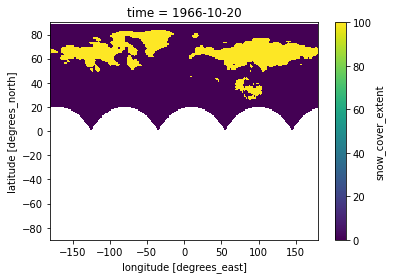

In [22]:
ds2[0,:,:].plot()


In [26]:
season='SON'
print(fyr-iyr+1)

52


In [24]:
vals,anoms=climb.seasonal_selection(ds2,season,iyr,fyr)
  

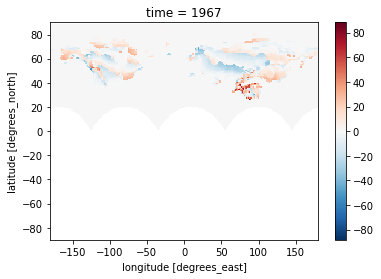

In [25]:
anoms[0,:,:].plot()


In [ ]:
def trend_vect2(x,y,dim):
    '''
    Compute the spatial trend vectorized, instead of grid by grid.
    ex:
    par=trend_vect(vals.time,vals,'time')

    Source:https://stackoverflow.com/questions/52094320/with-xarray-how-to-parallelize-1d-operations-on-a-multidimensional-dataset
    https://github.com/mickaellalande/MC-Toolkit/blob/master/conda_environment_xarray_xesmf_proplot/xarray/advanced-analysis.ipynb
    
    You can also use a loop on lon/lat but way longer!-> spatial_regression() #esta es una funcion mia
    '''
    print('trend-0','intercept-1','rvalue-2','pvalue-3','stderr-4')
    return xr.apply_ufunc(
        stats.mstats.linregress, x, y,
        input_core_dims=[[dim], [dim]],
        output_core_dims=[[], [], [], [], []],
        vectorize=True
    )

In [ ]:
p3=trend_vect2(vals3.time,vals3,'time')

In [ ]:
p3[0]

In [ ]:
parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
#---------------------------------------------------------
for elem in anomsList:
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])


In [ ]:
climb.show(trend_vect)

In [ ]:
par3=climb.trend_vect(vals3.time,vals3,'time')

In [ ]:
par3[0].plot()

In [ ]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

In [ ]:
clim3=vals3.mean('time')
std3=vals3.std('time')

In [ ]:
clim3.plot()

In [ ]:
##Clim-----------------
clevs=np.arange(0,110,10)
units='%'
color='YlGnBu'
subdomain='MA'
exp='obs'
decomp='original'
for i in range(len(climList)):
    lat,lon=climb.latlon(climList[i])
    figclim=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=climList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr)
    ofileC='clim_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figclim.savefig(plotsDir+ofileC+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileC)

In [ ]:
##Clim-----------------
clevs=np.arange(0,45,5)
color='rainbow'
subdomain='MA'
exp='obs'
decomp='original'
for i in range(len(stdList)):
    lat,lon=climb.latlon(stdList[i])
    figstd=myplot.oneplot_ds(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, color=color, units=units, subdomain=subdomain, ds=stdList[i], xlon=climList[i][lon], ylat=climList[i][lat], season=season, iyr=iyr, fyr=fyr)
    ofileS='anoms_std_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figstd.savefig(plotsDir+ofileS+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileS)

In [ ]:
clevs=np.arange(-25,30,5)
#color='RdBu_r'
subdomain='MA'
exp='obs'
decomp='original'
for i in range(len(parList)):
    lat,lon=climb.latlon(trendList[i])
    figtrend=myplot.oneplot_trend(variable=variable, decomp=decomp, exp=exp, model=modelList[i], clevs=clevs, units=units, subdomain=subdomain, par=parList[i], xlon=parList[i][0][lon], ylat=parList[i][0][lat], season=season, iyr=iyr, fyr=fyr)
 #   figtrend=myplot.oneplot_trend(oneplot_trend(variable,decomp,exp,modelList[i],clevs,units,subdomain,parList[i],xlon,ylat,season,iyr,fyr))
    ofileT='spatialtrend_'+variable+'_'+modelList[i]+'_'+exp+'_'+decomp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    figtrend.savefig(plotsDir+ofileT+'.png',format='png')
    print('Figure save at ',plotsDir, 'as',ofileT)

In [ ]:
coords2D={anoms3.dims[1]: anoms3.coords[anoms3.dims[1]],anoms3.dims[2]: anoms3.coords[anoms3.dims[2]]}
zero2D= xr.DataArray(np.zeros((anoms3.shape[1],anoms3.shape[2])),coords=coords2D,dims=[anoms3.dims[1],anoms3.dims[2]])

trend3=xr.zeros_like(zero2D)
intercept3=xr.zeros_like(zero2D)
rvalue3=xr.zeros_like(zero2D)
pvalue3=xr.zeros_like(zero2D)
stderr3=xr.zeros_like(zero2D)

par3=[]
for j in range(anoms3.shape[1]):
    for i in range(anoms3.shape[2]):
        if np.isnan(anoms3[:,j,i].values).all()==True:
            trend3[j,i]=np.nan
            intercept3[j,i]=np.nan
            rvalue3[j,i]=np.nan
            pvalue3[j,i]=np.nan
            stderr3[j,i]=np.nan
        else:
            Y=anoms3[:,j,i]    
            #print(anoms[:,j,i])
            Y2=Y[np.logical_not(np.isnan(Y.values))]
            X=np.arange(0,len(vals3[:,j,i]),1)
            X2=X[np.logical_not(np.isnan(Y.values))]
            par=stats.linregress(X2,Y2)
            trend3[j,i]=par[0]
            intercept3[j,i]=par[1]
            rvalue3[j,i]=par[2]
            pvalue3[j,i]=par[3]
            stderr3[j,i]=par[4]
par3=[trend3,intercept3,rvalue3,pvalue3,stderr3]
print('0-trend','1-intercept','2-rvalue','3-pvalue','4-stderr')

In [ ]:
ds_trend= xr.Dataset(
    data_vars=dict(
            trend=([field3.dims[1], field3.dims[2]],parspatial3[0].values),
            intercept=([field3.dims[1], field3.dims[2]],parspatial3[1].values),
            rvalue=([field3.dims[1], field3.dims[2]],parspatial3[2].values),
            pvalue=([field3.dims[1],field3.dims[2]],parspatial3[3].values),
            stderr=([field3.dims[1],field3.dims[2]],parspatial3[4].values),
            ),
    coords=dict(
            latitude=([field3.dims[1]],field3.coords[field3.dims[1]].values),
            longitude=([field3.dims[2]],field3.coords[field3.dims[2]].values),),
attrs=dict(description="spatial trend"),
        )
ofileT='spatialtrend'+'_' +variable+ '.obs'+'_'+season+'_'+model3+'_historical_'+domain+'_'+str(iyr)+'_'+str(fyr)

new_filenameT = resultsDirT+ofileT+'.nc'
print ('saving to ', new_filenameT)
ds_trend.to_netcdf(path=new_filenameT)
ds_trend.close()

In [ ]:
#t=np.where(trend > 1000,np.nan,trend)

In [ ]:
len(trendList)

In [ ]:
trendList.append(trend)
pvalueList.append(pvalue)


In [ ]:
xList=[xlon1,xlon2,xlon3]
yList=[ylat1,ylat2,ylat3]

In [ ]:

unit='%'
clevs=np.arange(-10,11,1)
color='bwr_r'
models=[model1,model2,model3]
nrows=3
ncols=1
subdomain='HMA'
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(subdomain)

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))

axs=axs.flatten()
#Loop over all of the models
for i in np.arange(0,len(trendList),1):
# Contour plot
        lons, lats = np.meshgrid(xList[i],yList[i])

        CS1=axs[i].contourf(lons,lats, 10*trendList[i],clevs,
                transform=ccrs.PlateCarree(),
                cmap=color,extent='both')
        levels=[0,0.1,1.0]
        cs = axs[i].contourf(lons,lats,pvalueList[i], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
        # Title each subplot with the name of the model
        #axs[i].set_title(i+1)
        axs[i].text(0.02, 0.01, models[i],
        verticalalignment='bottom', horizontalalignment='left',
        transform=axs[i].transAxes,
        color='black', fontsize=12)
        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
        axs[i].add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='white'))
        axs[i].set_extent([lonW, lonE, latS,latN])

        # Longitude and latitude labels
        #axs[i].set_xticks(np.arange(lonW+10,lonE,10), crs=ccrs.PlateCarree())
        #axs[i].set_yticks(np.arange(latS+5,latN,5), crs=ccrs.PlateCarree())

# Delete the unwanted axes
#for i in [7,8]:
 #   fig.delaxes(axs[i])

# Adjust the location of the subplots on the page to make room for the colorbar
#fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
#                    wspace=0.05, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
# Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s $(10yr)^{-1}$'%(unit))
# Add a big title at the top

plotname='spatialtrend_'+variable+'_obs_'+season+'_historical_'+domain+'_'+str(iyr)+'_'+str(fyr)
#plt.suptitle('%s forced %s %s %s %i-%i'%(variable,model,domain,season,iyr,fyr),y=0.90)
plt.savefig(plotsDir+plotname+'.png',format='png')
#fig.tight_layout()
plt.show()
